Elbow method  & silhouette score fo K selection 

    customer segmentation data

step - 1 import necessary libraries

In [7]:
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

step - 2 load and preprocess the data 

In [12]:

data=pd.read_csv("c:\\Users\\Administrator\\Downloads\\customer_segmentation.csv")

data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
# drop non numeric and irrlevant column (e,g , id, gender, etc)

data= data.drop(columns=['ID','Gender','Ever_Married','Graduated','Profession','Spending_core','Var_1','Segmentation'])

In [16]:
data.head()

,Age,Work_Experience,Family_Size
0,22,1.0,4.0
1,38,NaN,3.0
2,67,1.0,1.0
3,67,0.0,2.0
4,40,NaN,6.0


In [17]:
data.shape

(10695, 3)

In [19]:
data.isnull().sum()

Age                   0
Work_Experience    1098
Family_Size         448
dtype: int64

In [20]:
data=data.dropna()

In [21]:
data.shape

(9236, 3)

step - 3 scale the data (if needed)

In [25]:
scaler= StandardScaler()
data_scaled=scaler.fit_transform(data)
data_scaled

array([[-1.29420836, -0.47629886,  0.75349091],
       [ 1.41867106, -0.47629886, -1.19897576],
       [ 1.41867106, -0.77173851, -0.54815354],
       ...,
       [-0.51048764, -0.47629886, -1.19897576],
       [ 0.21294687, -0.47629886,  1.40431313],
       [-0.02819797,  1.88721829,  0.10266869]])

In [27]:
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)

data_scaled

,Age,Work_Experience,Family_Size
0,-1.294208,-0.476299,0.753491
1,1.418671,-0.476299,-1.198976
2,1.418671,-0.771739,-0.548154
3,0.755523,-0.771739,-0.548154
4,-0.691346,-0.476299,0.102669
...,...,...,...
9231,-0.510488,-0.476299,-0.548154
9232,-0.872205,1.887218,0.753491
9233,-0.510488,-0.476299,-1.198976
9234,0.212947,-0.476299,1.404313


In [29]:
data_z=data.apply(zscore)
data_z

,Age,Work_Experience,Family_Size
0,-1.294208,-0.476299,0.753491
2,1.418671,-0.476299,-1.198976
3,1.418671,-0.771739,-0.548154
5,0.755523,-0.771739,-0.548154
6,-0.691346,-0.476299,0.102669
...,...,...,...
10689,-0.510488,-0.476299,-0.548154
10690,-0.872205,1.887218,0.753491
10691,-0.510488,-0.476299,-1.198976
10693,0.212947,-0.476299,1.404313


Step - 4 Apply K-Means for various K values 

In [36]:
inertia_values=[]
silhouette_scores=[]
K_range=range(2, 11)     #You can adjust range as you needed


for k in K_range:
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    print(kmeans.labels_)
    # inertia (within-cluster sum of squres )
    inertia_values.append(kmeans.inertia_)


    # silhouette_score

    silhouette=silhouette_score(data_scaled,kmeans.labels_)
    silhouette_scores.append(silhouette)





[0 1 1 ... 1 0 1]
[2 1 1 ... 1 2 0]
[2 1 1 ... 0 2 3]
[0 1 1 ... 4 2 3]
[0 1 1 ... 4 2 3]
[0 1 1 ... 4 2 3]
[0 1 1 ... 5 6 4]
[0 1 1 ... 5 6 8]
[0 1 1 ... 5 6 8]


In [37]:
kmeans.labels_

array([0, 1, 1, ..., 5, 6, 8])

In [38]:

inertia_values

[20124.07109280248,
 13014.664681611672,
 9801.31270715444,
 8531.05058881542,
 7323.934017203172,
 6309.327486234021,
 5837.207684092016,
 5495.217968385097,
 5230.415340103163]

In [39]:
silhouette_scores

[0.2694972009523588,
 0.3543380730251246,
 0.35186036094189155,
 0.3564238777132847,
 0.36285216732331926,
 0.35808478192614307,
 0.3515340641430051,
 0.34044504989108004,
 0.34820568097637344]

Step - 5 Elbow Method 

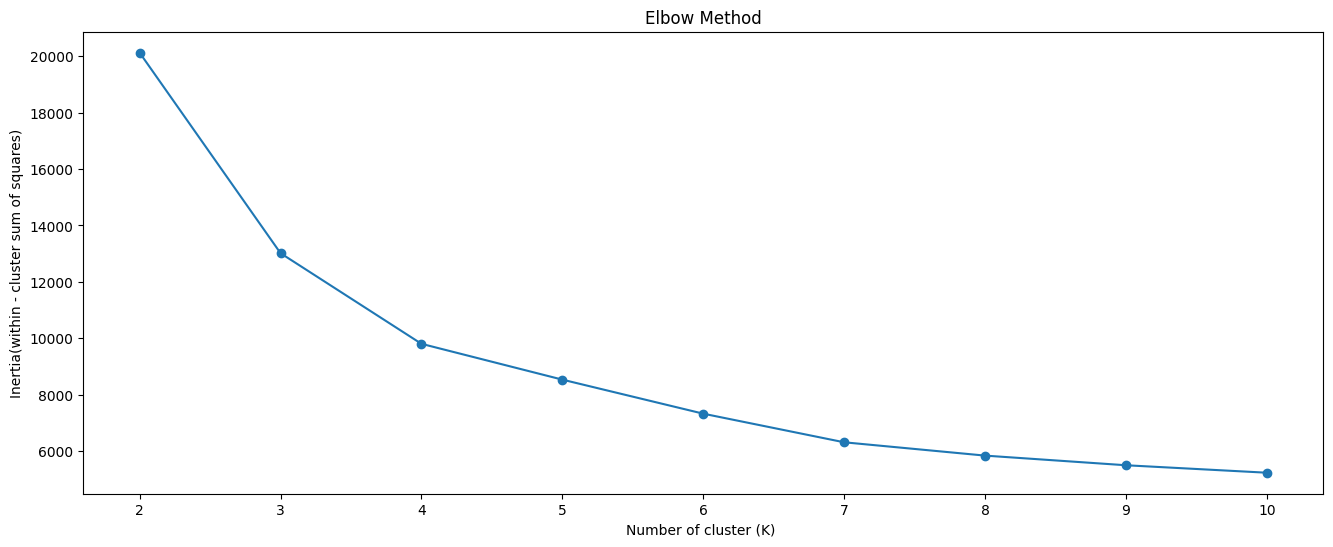

In [41]:
plt.figure(figsize=(16,6))
plt.plot(K_range,inertia_values, marker="o", linestyle='-')
plt.xlabel("Number of cluster (K) ")
plt.ylabel("Inertia(within - cluster sum of squares)")
plt.title("Elbow Method")
plt.show()

Step - 6 Silhouette Score

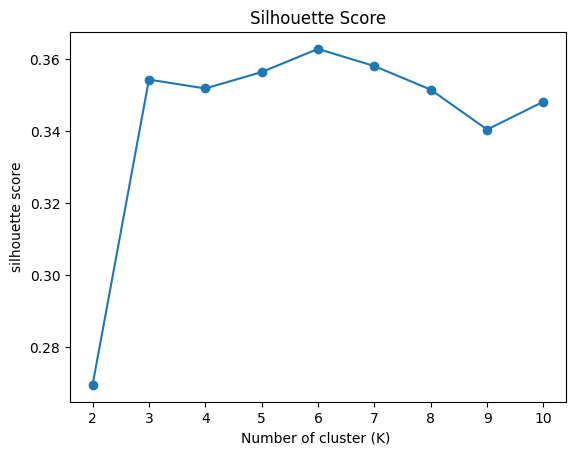

In [43]:

plt.plot(K_range,silhouette_scores, marker="o", linestyle='-')
plt.xlabel("Number of cluster (K) ")
plt.ylabel("silhouette score")
plt.title("Silhouette Score")
plt.show()

Step - 7 Interpretation

In [1]:
# Find the K value from the Elbow Method
elbow_K = 3  # Replace with the K value where you observe the "elbow" in the plot

# Find the K value from the Silhouette Score
silhouette_K = 4  # Replace with the K value that maximizes the Silhouette Score

# Print the selected K values
print(f"Selected K value from Elbow Method: {elbow_K}")
print(f"Selected K value from Silhouette Score: {silhouette_K}")


Selected K value from Elbow Method: 3
Selected K value from Silhouette Score: 4


In [2]:
'''You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and
the characteristics of the dataset'''

'You can use either the K value from the Elbow Method or the Silhouette Score, based on your preference and\nthe characteristics of the dataset'